# From Asset Management to Asset-Liability Management

## Pension Fund Crisis

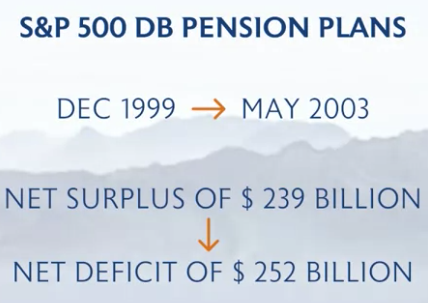

* in 2003 500 billion have just disappeared!
* Due to the so called: pension perfect storm of adverse market conditions
* what has happened is signaling the weakness of risk management and asset allocation practices
* The same happened in 2009

## Introducing a Liability Benchmark

<div class="alert alert-block alert-warning">
    <b>⚠️</b> When we manage assets against liabilities, what matters is what happens to the asset relative to the liabilities. Not the value of assets per se!
</div>

* If asset value goes down, but value goes down even more, this is actually good news.
* What matters is what happens to the funding ratio: the ratio of assets divided by liabilities.

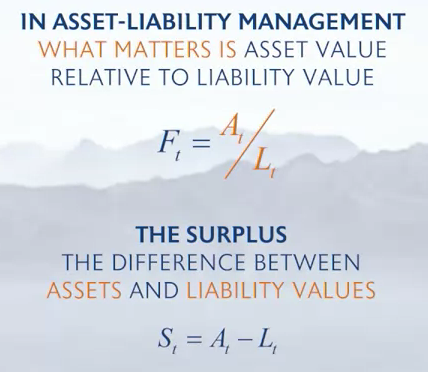


<div class="alert alert-block alert-info">
<b>Wrup-Up</b><br/> 
    <ul>
        <li>What matters is not the value of assets per se but the value of assets relative to liabilities.</li>
        <li>Funding ration measures the assets relative to liabilities.</li>
        <li>If it is equal to 100% it means that assets are sufficient to cover liabilities</li> 
    </ul>

</div>

## Lab Session - Present Values, Liabilities and Funding Ratio

In this lab session, we'll examine how to discount future liabilities to compute the present value of future liabilities, and measure the funding ratio.

The funding ratio is the ratio of the current value of assets to the present value of the liabilities. In order to compute the present value, we need to discount the amount of the liability based on the relevant interest rate derived from the yield curve. For simplicity, we'll assume that the yield curve is flat, and so the interest rate is the same for all horizons.

The present value of a set of liabilities $L$ where each liability $L_i$ is due at time $t_i$ is give by:

$$ PV(L) = \sum_{i=1}^{k} B(t_i) L_i$$

where $B(t_i)$ is the price of a pure discount bond that pays 1 dollar at time $t_i$

If we assume the yield curve is flat and the annual rate of interest is $r$ then $B(t)$ is given by

$$B(t) = \frac{1}{(1+r)^t}$$

In [1]:
# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import edhec_risk_kit as erk

# Set up Notebook
%matplotlib inline
# We do this to ignore several specific warnings
warnings.filterwarnings('ignore')
sns.set_style('white')

# Disable jedi autocompleter
%config Completer.use_jedi = False

In [2]:
# set notebook environment

pd.options.display.float_format = '{:,.2f}'.format
plt.rcParams["figure.figsize"] = 10,8
pd.set_option('display.width', 100)
plt.rcParams.update({'font.size': 18})

# auto load imports
# in case of module dev
%load_ext autoreload
%autoreload 2

In [3]:
def discount(t, r):
    """
    Compute the price of a pure discount bond that pays $1 at time t,
    where t is in years and r is the annual interest rate
    """
    return (1+r)**(-t)

In [4]:
b = discount(10, .03)
b

0.7440939148967249

In [5]:
0.744*(1.03**10)

0.9998737862320269

In [6]:
def pv(l, r):
    """
    Compute the present value of a list of liabilities given by the time (as an index) and amounts 
    """
    dates = l.index
    discounts = discount(dates, r)
    return (discounts*l).sum()

In [7]:
liabilities = pd.Series(data=[1, 1.5, 2, 2.5], index=[3, 3.5, 4, 4.5])
pv(liabilities, 0.03)

6.233320315080045

We can now compute the funding ratio, based on current asset values:

In [8]:
def funding_ratio(assets, liabilities, r):
    """
    Computes the funding ratio of a series of liabilities, 
    based on an interest rate and current value of assets
    """
    return assets/pv(liabilities, r)


In [9]:
funding_ratio(5, liabilities, 0.03)

0.8021407126958777

Let's build a funding ration playground to understand how assets and liability ratio influence the funding ratio

In [10]:
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline

def show_funding_ratio(assets, r):
    fr = funding_ratio(assets, liabilities, r)
    print(f'{fr*100:.2f}%')
    
controls = widgets.interactive(show_funding_ratio,
                                   assets=widgets.IntSlider(min=1, max=10, step=1, value=5),
                                   r=(0, .20, .01)
)
display(controls)

interactive(children=(IntSlider(value=5, description='assets', max=10, min=1), FloatSlider(value=0.1, descript…

As the illustration above shows, even if your assets do not go down in value, cash can be a risky asset if you think about the funding ratio rather than the asset value. 

<div class="alert alert-block alert-warning">
Even though cash is a "safe asset" in the sense that the asset value does not go down, cash can be a very risky asset because the value of the liabilities goes up when interest rates go down. Therefore, if you think about your savings in terms of funding ratio (i.e. how much money do you have compared to what you need) then cash is a risky asset and can result in a decline in your funding ratio.
    
</div>